In [222]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os as os

np.random.seed(42)

## Set path for training data
train_pos='./hot-dog-not-hot-dog/train/hot_dog/'
train_neg='./hot-dog-not-hot-dog/train/not_hot_dog/'

## Set path for validation data
test_pos='./hot-dog-not-hot-dog/test/hot_dog/'
test_neg='./hot-dog-not-hot-dog/test/not_hot_dog/'

Training images are organized in separate folders for positive and negative classes.
We read images from both folders into a numpy array, resize images to be the same size, and standardize values by dividing all pixel values by 255


In [223]:
## As images are of different sizes, we resize all images to same size.. Setting size:
img_width=64
img_height=64
img_size=img_width*img_height
img_size_tuple=(img_width,img_height)

## Create empty np array where we will write all training data. size of array [no of examples,image_size*3] for RGB images
train_data=np.empty([498,img_size*3])
Y=np.empty([498,1])

#Read images from train folders
i=0
for im in os.listdir(train_pos):
    image=cv.imread(train_pos+im)
    image=cv.resize(image, img_size_tuple, interpolation=cv.INTER_CUBIC)
    image=image.reshape(1,img_size*3)
    
    train_data[i]=image
    Y[i]=1
    i+=1

for im in os.listdir(train_neg):
    image=cv.imread(train_neg+im)
    image=cv.resize(image, img_size_tuple, interpolation=cv.INTER_CUBIC)
    image=image.reshape(1,img_size*3)
    
    train_data[i]=image
    Y[i]=0
    i+=1


In [224]:
## Preprocessing: Standardise values, transpose to have training examples in columns and features as rows
train=train_data/255
train = train.T
Y=Y.T

print("Training Data Shape: ",train.shape,"\n Y vector Shape: ", Y.shape)

Training Data Shape:  (12288, 498) 
 Y vector Shape:  (1, 498)


In [225]:
## Set Number of nodes

# nodes in input layer = no of features
# nodes in hidden layer = hyperparameter
# nodes in output later = 1 for binary classification

n_0 = train.shape[0]
n_1 = 6
n_2 = 1


Now we define functions step by step:
    
    1. Set weights
    2. Get linear response
    3. Get activation - sigmoid and tanh for layer 2 and 1 resp
    4. Compute cost
    5. Get gradients
    6. Update weights
    
    Repeat steps 2-5 until condition

In [226]:
def init_weights(n_0,n_1,n_2):
    
    ## weights for layer l have dims [n_l,n_(l-1)]; bias term for layer l has dim [l,1]
    W1 = np.random.randn(n_1,n_0) * 0.01
    b1 = np.zeros((n_1,1))
    W2 = np.random.randn(n_2,n_1)*0.01
    b2 = np.zeros((n_2,1))

    weights = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return weights

In [227]:
## For forward propogation: get linear response, and then apply activation function

def sigmoid(x):
    sigmoid=1/(1+np.exp(-1*x))
    return sigmoid

def get_response(train, weights):


    lin_resp_1 = np.dot(weights["W1"],train) + np.sum(weights["b1"], axis=1, keepdims=True)
    A1 = np.tanh(lin_resp_1)
    
    
    lin_resp_2 = np.dot(weights["W2"],A1) + np.sum(weights["b2"], axis=1, keepdims=True)
    A2 = sigmoid(lin_resp_2)

    
    temp = {"lin_resp_1": lin_resp_1,
             "A1": A1,
             "lin_resp_2": lin_resp_2,
             "A2": A2}
    
    return A2, temp

In [228]:
def get_cost(Y,weights,A2):
    
    m=Y.shape[1]
    cost=(-1/m)*np.sum(((Y*np.log(A2))+((1-Y)*np.log(1-A2))))

    return cost

In [229]:
## Backprop

## Taken from Andrew NG's deeplearning.ai lecture series

def get_gradients(weights, temp, train, Y):

    m = train.shape[1]
    


    dZ2 = temp["A2"]-Y
    dW2 = np.dot(dZ2, temp["A2"].T)/m
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(weights["W2"].T, dZ2) * (1-np.power(temp["A1"],2))
    dW1 = np.dot(dZ1, train.T)/m
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [230]:
## Update Weights
def update_weights(weights,grads,alpha):
    W1=weights["W1"]-(alpha*grads["dW1"])
    b1=weights["b1"]-(alpha*grads["db1"])
    W2=weights["W2"]-(alpha*grads["dW2"])
    b2=weights["b2"]-(alpha*grads["db2"])
    
    weights = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
                      
    return weights


In [231]:
def run(train, Y, n_1, iter, alpha):
    
    weights = init_weights(n_0,n_1,n_2)
    cost=[]
    
    for i in range(0,iter):
    
        A2, temp = get_response(train, weights)
    
        cost.append(get_cost(Y,weights,A2))
        
        grads=get_gradients(weights, temp, train, Y)
        
        weights=update_weights(weights,grads,alpha)
        
        
        if i%1000==0:
            print("cost at iter {} =".format(i), cost[i])
    
    
    plt.plot(cost,label="Cost by Iteration")
    
    return weights

cost at iter 0 = 0.6931760390393897
cost at iter 1000 = 0.6928420260783854
cost at iter 2000 = 0.6925897402353192
cost at iter 3000 = 0.6922997392005877
cost at iter 4000 = 0.6919591039058532
cost at iter 5000 = 0.6916154319490438
cost at iter 6000 = 0.6913028745261055
cost at iter 7000 = 0.6910389028825675
cost at iter 8000 = 0.6908353932523815
cost at iter 9000 = 0.6906992424634899


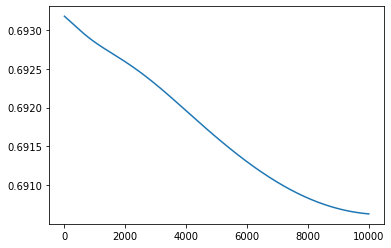

In [232]:
# Finally, train network
alpha=0.001
iter=10000
trained_weights=run(train, Y, n_1, iter, alpha)

Read validation data and make predictions:

In [233]:
test_data=np.empty([500,img_size*3])
Y_test=np.empty([500,1])
#Read images from train folders
i=0
for im in os.listdir(test_pos):
    image=cv.imread(test_pos+im)
    image=cv.resize(image, img_size_tuple, interpolation=cv.INTER_CUBIC)
    image=image.reshape(1,img_size*3)
    
    test_data[i]=image
    Y_test[i]=1
    i+=1

for im in os.listdir(test_neg):
    image=cv.imread(test_neg+im)
    image=cv.resize(image, img_size_tuple, interpolation=cv.INTER_CUBIC)
    image=image.reshape(1,img_size*3)
    
    test_data[i]=image
    Y_test[i]=0
    i+=1
    


## Apply same preprocessing steps as with training data
test=test_data/255
test=test.T
Y_test=Y_test.T

print("Test Data Shape: ",test.shape,"\n Y vector Shape: ", Y_test.shape)

Test Data Shape:  (12288, 500) 
 Y vector Shape:  (1, 500)


In [234]:
resp,_= get_response(test, trained_weights)
preds=resp>0.5

(np.sum(preds==Y_test))/Y_test.shape[1]

0.558